# Import Library

In [265]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import time series library
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [266]:
# load dataset
df_customer = pd.read_csv('Customer.csv', delimiter = ';')
df_product = pd.read_csv('Product.csv', delimiter = ';')
df_store = pd.read_csv('Store.csv', delimiter = ';')
df_transaction = pd.read_csv('Transaction.csv', delimiter = ';')

# Data Cleaning

In [267]:
# data cleaning
# head data
print(df_customer.head())
print(df_product.head())
print(df_store.head())
print(df_transaction.head())

   CustomerID  Age  Gender Marital Status Income
0           1   55       1        Married   5,12
1           2   60       1        Married   6,23
2           3   32       1        Married   9,17
3           4   31       1        Married   4,87
4           5   58       1        Married   3,57
  ProductID   Product Name  Price
0        P1      Choco Bar   8800
1        P2  Ginger Candy    3200
2        P3       Crackers   7500
3        P4    Potato Chip  12000
4        P5       Thai Tea   4200
   StoreID         StoreName GroupStore           Type   Latitude   Longitude
0        1     Prima Tendean      Prima   Modern Trade       -6,2  106,816666
1        2  Prima Kelapa Dua      Prima   Modern Trade  -6,914864  107,608238
2        3        Prima Kota      Prima   Modern Trade  -7,797068  110,370529
3        4       Gita Ginara       Gita  General Trade  -6,966667  110,416664
4        5           Bonafid       Gita  General Trade  -7,250445  112,768845
  TransactionID  CustomerID       

In [268]:
# info data
print(df_customer.info())
print(df_product.info())
print(df_store.info())
print(df_transaction.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --

In [269]:
# change data type
df_customer['Income'] = df_customer['Income'].str.replace(',', '.').astype('float')
df_store['Latitude'] = df_store['Latitude'].str.replace(',', '.').astype('float')
df_store['Longitude'] = df_store['Longitude'].str.replace(',', '.').astype('float')
df_transaction['Date'] = pd.to_datetime(df_transaction['Date'])

In [270]:
# merge data
df_merge = pd.merge(df_customer, df_transaction, on = 'CustomerID')
df_merge = pd.merge(df_merge, df_product.drop(columns = 'Price'), on = 'ProductID')
df_merge = pd.merge(df_merge, df_store, on = 'StoreID')
df_merge.head()

,CustomerID,Age,Gender,Marital Status,Income,TransactionID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,1,55,1,Married,5.12,TR54475,2022-02-23,P8,16000,1,16000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
1,5,58,1,Married,3.57,TR53643,2022-05-22,P8,16000,3,48000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
2,7,31,0,Married,4.57,TR5151,2022-10-03,P8,16000,2,32000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
3,19,24,1,Single,4.14,TR98635,2022-06-18,P8,16000,1,16000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
4,28,55,0,Married,6.08,TR9420,2022-12-01,P8,16000,3,48000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643


# Time Series

## Modelling

In [271]:
# model regresi: time series
df_regresi = df_merge.groupby('Date').agg({'Qty':'sum'}).reset_index()
df_regresi.head()

,Date,Qty
0,2022-01-01,49
1,2022-01-02,50
2,2022-01-03,76
3,2022-01-04,98
4,2022-01-05,67


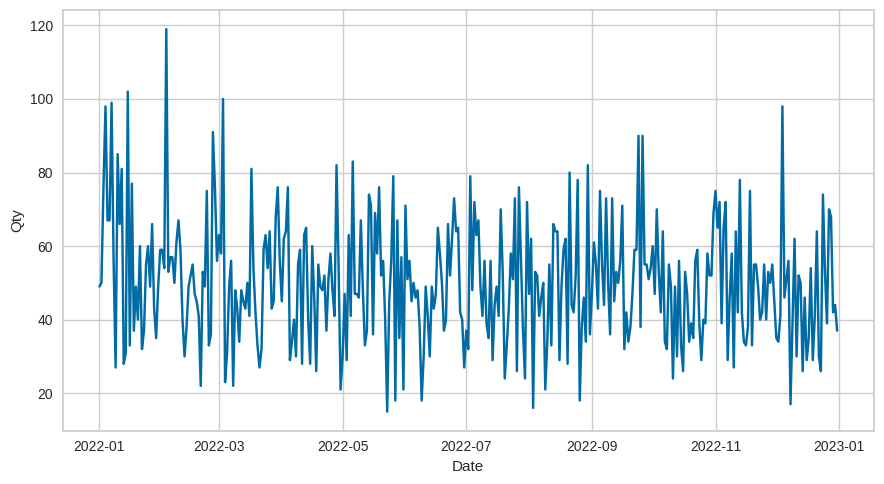

In [272]:
fig, ax = plt.subplots(figsize=(9, 5))
sns.lineplot(x = 'Date', y = 'Qty', data = df_regresi)
plt.tight_layout()

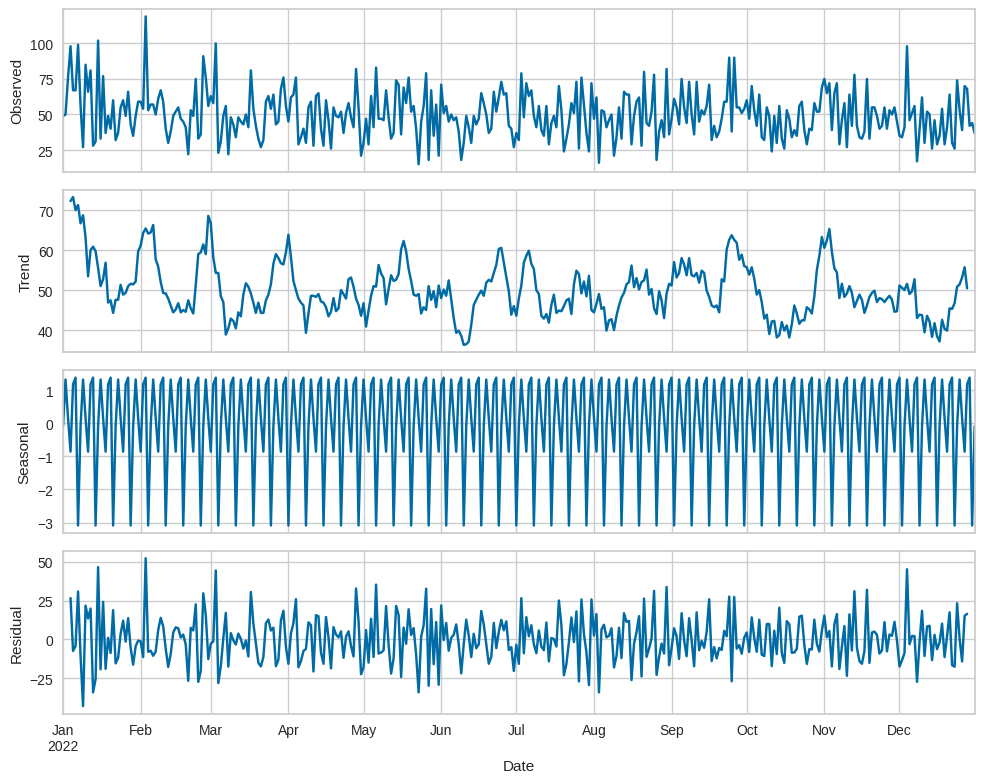

In [273]:
df_regresi_index = df_regresi.set_index('Date')
regresi_decomposition = seasonal_decompose(df_regresi_index)

# Plot the decomposition results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (10, 8), sharex = True)
regresi_decomposition.observed.plot(ax = ax1)
ax1.set_ylabel('Observed')
regresi_decomposition.trend.plot(ax = ax2)
ax2.set_ylabel('Trend')
regresi_decomposition.seasonal.plot(ax = ax3)
ax3.set_ylabel('Seasonal')
regresi_decomposition.resid.plot(ax = ax4)
ax4.set_ylabel('Residual')

plt.tight_layout()

In [274]:
# Splitting the data into training and testing sets
train_size = int(len(df_regresi) * 0.8)  # 80% data for training, 20% for testing
train_data, test_data = df_regresi.iloc[:train_size], df_regresi.iloc[train_size:]

In [275]:
train_data.head()

,Date,Qty
0,2022-01-01,49
1,2022-01-02,50
2,2022-01-03,76
3,2022-01-04,98
4,2022-01-05,67


In [276]:
test_data.head()

,Date,Qty
292,2022-10-20,39
293,2022-10-21,35
294,2022-10-22,56
295,2022-10-23,59
296,2022-10-24,39


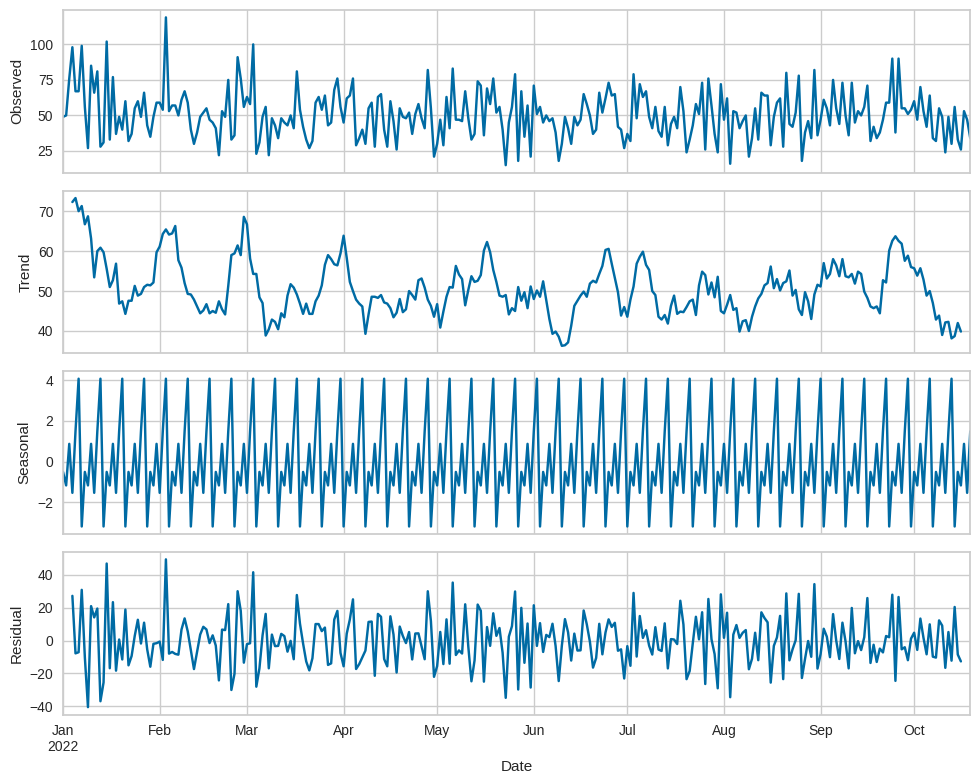

In [277]:
train_data_index = train_data.set_index('Date')
regresi_decomposition = seasonal_decompose(train_data_index)

# Plot the decomposition results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (10, 8), sharex = True)
regresi_decomposition.observed.plot(ax = ax1)
ax1.set_ylabel('Observed')
regresi_decomposition.trend.plot(ax = ax2)
ax2.set_ylabel('Trend')
regresi_decomposition.seasonal.plot(ax = ax3)
ax3.set_ylabel('Seasonal')
regresi_decomposition.resid.plot(ax = ax4)
ax4.set_ylabel('Residual')

plt.tight_layout()

In [278]:
# Statistical test to validate stationarity

# Ho = The data is not stationary
# Ha = The data is stationary

alpha = 0.05
adfuller_pvalue = adfuller(train_data['Qty'])[1]

if adfuller_pvalue <= alpha:
    print('Reject Ho. The data is stationary')
    print(adfuller_pvalue)
else:
    print('Fail to reject Ho. The data is not stationary')
    print(adfuller_pvalue)

Reject Ho. The data is stationary
8.939693654974982e-30


Uji ADF di atas menunjukkan bahwa data sudah stasioner. Akan tetapi, plot time series menunjukkan datanya belum stasioner secara musiman. Sehingga, akan dilakukan differencing tiap lag musimannya, yaitu lag 7.

In [279]:
diff_mus7 = train_data['Qty'].diff(periods = 7)
diff_mus7

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
287     1.0
288   -29.0
289     4.0
290    23.0
291   -15.0
Name: Qty, Length: 292, dtype: float64

In [280]:
# Statistical test to validate stationarity

# Ho = The data is not stationary
# Ha = The data is stationary

alpha = 0.05
adfuller_pvalue = adfuller(diff_mus7.dropna())[1]

if adfuller_pvalue < alpha:
    print('Reject Ho. The data is stationary')
    print(adfuller_pvalue)
else:
    print('Fail to reject Ho. The data is not stationary')
    print(adfuller_pvalue)

Reject Ho. The data is stationary
8.752600524789744e-13


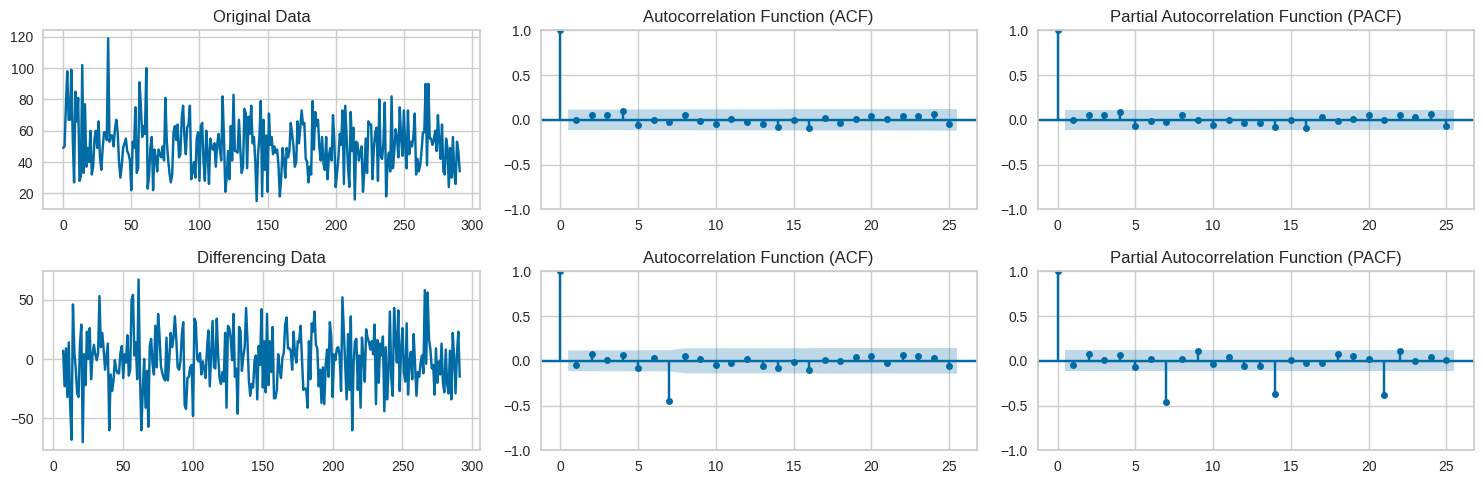

In [281]:
# subplot
fig, ax = plt.subplots(2, 3, figsize = (15,5))

# plot the original data
ax[0, 0].plot(train_data['Qty'])
ax[0, 0].set_title('Original Data')

# plot the ACF and PACF
plot_acf(train_data['Qty'], ax = ax[0, 1])
ax[0, 1].set_title('Autocorrelation Function (ACF)')

plot_pacf(train_data['Qty'], ax = ax[0, 2])
ax[0, 2].set_title('Partial Autocorrelation Function (PACF)')

# plot the differencing data
ax[1, 0].plot(diff_mus7.dropna())
ax[1, 0].set_title('Differencing Data')

# plot the ACF and PACF
plot_acf(diff_mus7.dropna(), ax = ax[1, 1])
ax[1, 1].set_title('Autocorrelation Function (ACF)')

plot_pacf(diff_mus7.dropna(), ax = ax[1, 2])
ax[1, 2].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()

Model Seasonal ARIMA yang terbentuk adalah ARIMA (0, 0, 0) dengan seasonal (0, 1, 1, 7). Akan tetapi, kita juga akan melakukan pengecekan untuk model gabungan MA = 1 dan/atau AR = 1, sehingga model yang mungkin terbentuk adalah model seasonal (0, 1, 1, 7), (1, 1, 0, 7), atau (1, 1, 1, 7).

In [282]:
def rmse(y_actual, y_pred):
  print(f'RMSE Value: {mean_squared_error(y_actual, y_pred)**0.5}')
def rsquare(y_actual, y_pred):
  print(f'R-squared Value: {r2_score(y_actual, y_pred)}')
def eval(y_actual, y_pred):
  rmse(y_actual, y_pred)
  rsquare(y_actual, y_pred)
  print(f'MAE Value: {mean_absolute_error(y_actual, y_pred)}')

In [283]:
# Fit the ARIMA(0,0,0)(0,1,1,7) seasonal model
order = (0,0,0)
seasonal_order = (0, 1, 1, 7)
model = sm.tsa.SARIMAX(train_data['Qty'], order = order, seasonal_order = seasonal_order)
fit_qty = model.fit()
print(fit_qty.summary())

                                 SARIMAX Results                                 
Dep. Variable:                       Qty   No. Observations:                  292
Model:             SARIMAX(0, 1, [1], 7)   Log Likelihood               -1224.708
Date:                   Sun, 30 Jul 2023   AIC                           2453.417
Time:                           09:55:43   BIC                           2460.722
Sample:                                0   HQIC                          2456.345
                                   - 292                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L7       -0.9350      0.040    -23.547      0.000      -1.013      -0.857
sigma2       300.6123     25.071     11.991      0.000     251.474     349.750
Ljung-Box (L1) (Q):         

RMSE Value: 16.022042682930422
R-squared Value: -0.09701244086943173
MAE Value: 13.328690484521504


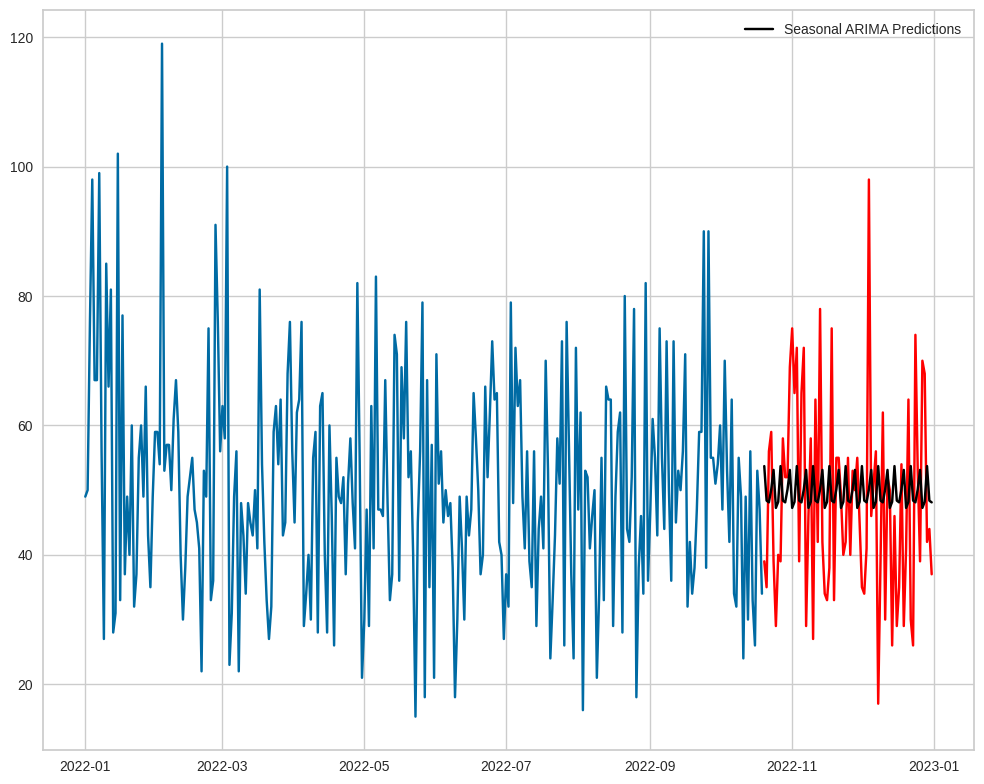

In [284]:
# ARIMA (0,0,0) Seasonal (0,1,1,7)
df_train = train_data.set_index('Date')
df_test = test_data.set_index('Date')

y_pred = fit_qty.get_forecast(len(df_test))

y_pred_df = y_pred.conf_int()
y_pred_df['predictions'] = fit_qty.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = df_test.index
y_pred_out = y_pred_df['predictions']

eval(df_test['Qty'], y_pred_out)

plt.figure(figsize = (10,8))
plt.plot(df_train['Qty'])
plt.plot(df_test['Qty'], color = 'red')
plt.plot(y_pred_out, color = 'black', label = 'Seasonal ARIMA Predictions')
plt.legend()

plt.tight_layout()

In [285]:
# Fit the ARIMA(0,0,0)(1,1,1,7) seasonal model
order = (0,0,0)
seasonal_order = (1, 1, 1, 7)
model = sm.tsa.SARIMAX(train_data['Qty'], order = order, seasonal_order = seasonal_order)
fit_qty = model.fit()
print(fit_qty.summary())

                                 SARIMAX Results                                 
Dep. Variable:                       Qty   No. Observations:                  292
Model:             SARIMAX(1, 1, [1], 7)   Log Likelihood               -1224.298
Date:                   Sun, 30 Jul 2023   AIC                           2454.596
Time:                           09:55:44   BIC                           2465.554
Sample:                                0   HQIC                          2458.989
                                   - 292                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7       -0.0609      0.066     -0.927      0.354      -0.190       0.068
ma.S.L7       -0.9209      0.041    -22.734      0.000      -1.000      -0.841
sigma2       300.2902     24

RMSE Value: 16.07272935224695
R-squared Value: -0.10396434594603399
MAE Value: 13.358618452338368


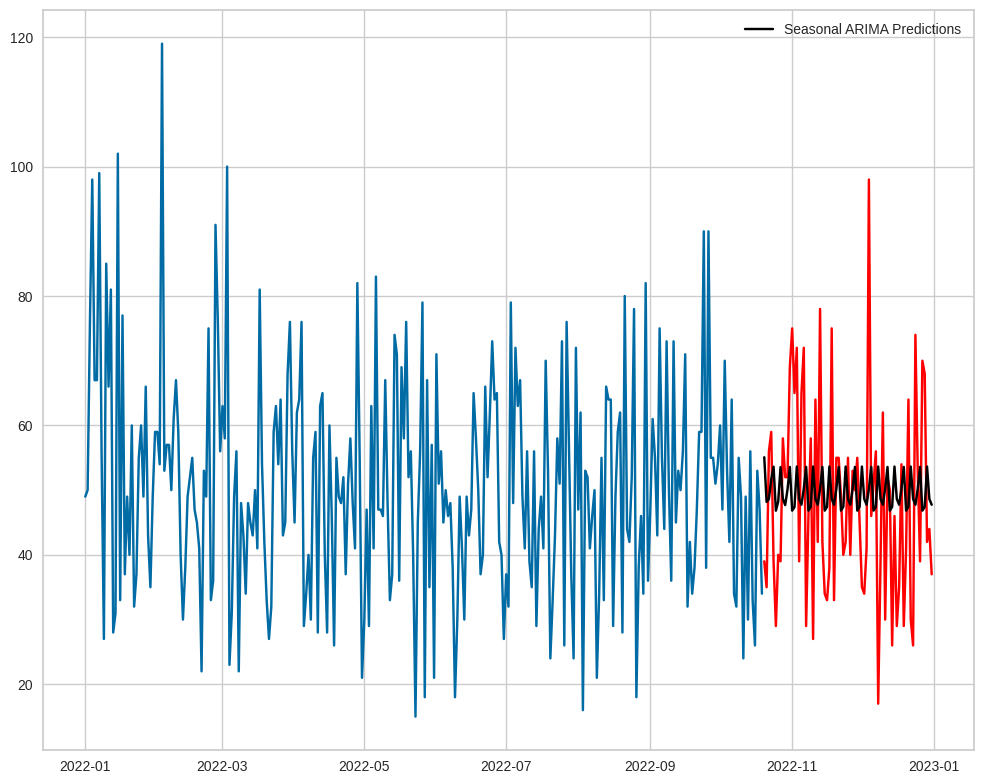

In [286]:
# ARIMA (0,0,0) Seasonal (1,1,1,7)
df_train = train_data.set_index('Date')
df_test = test_data.set_index('Date')

y_pred = fit_qty.get_forecast(len(df_test))

y_pred_df = y_pred.conf_int()
y_pred_df['predictions'] = fit_qty.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = df_test.index
y_pred_out = y_pred_df['predictions']

eval(df_test['Qty'], y_pred_out)

plt.figure(figsize = (10,8))
plt.plot(df_train['Qty'])
plt.plot(df_test['Qty'], color = 'red')
plt.plot(y_pred_out, color = 'black', label = 'Seasonal ARIMA Predictions')
plt.legend()

plt.tight_layout()

In [287]:
# Fit the ARIMA(0,0,0)(1,1,0,7) seasonal model
order = (0,0,0)
seasonal_order = (1, 1, 0, 7)
model = sm.tsa.SARIMAX(train_data['Qty'], order = order, seasonal_order = seasonal_order)
fit_qty = model.fit()
print(fit_qty.summary())

                                SARIMAX Results                                
Dep. Variable:                     Qty   No. Observations:                  292
Model:             SARIMAX(1, 1, 0, 7)   Log Likelihood               -1276.238
Date:                 Sun, 30 Jul 2023   AIC                           2556.475
Time:                         09:55:45   BIC                           2563.780
Sample:                              0   HQIC                          2559.404
                                 - 292                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7       -0.4735      0.051     -9.254      0.000      -0.574      -0.373
sigma2       451.2209     38.111     11.840      0.000     376.525     525.917
Ljung-Box (L1) (Q):                   0.18  

RMSE Value: 18.844472452071
R-squared Value: -0.5175525959705869
MAE Value: 14.653489452408634


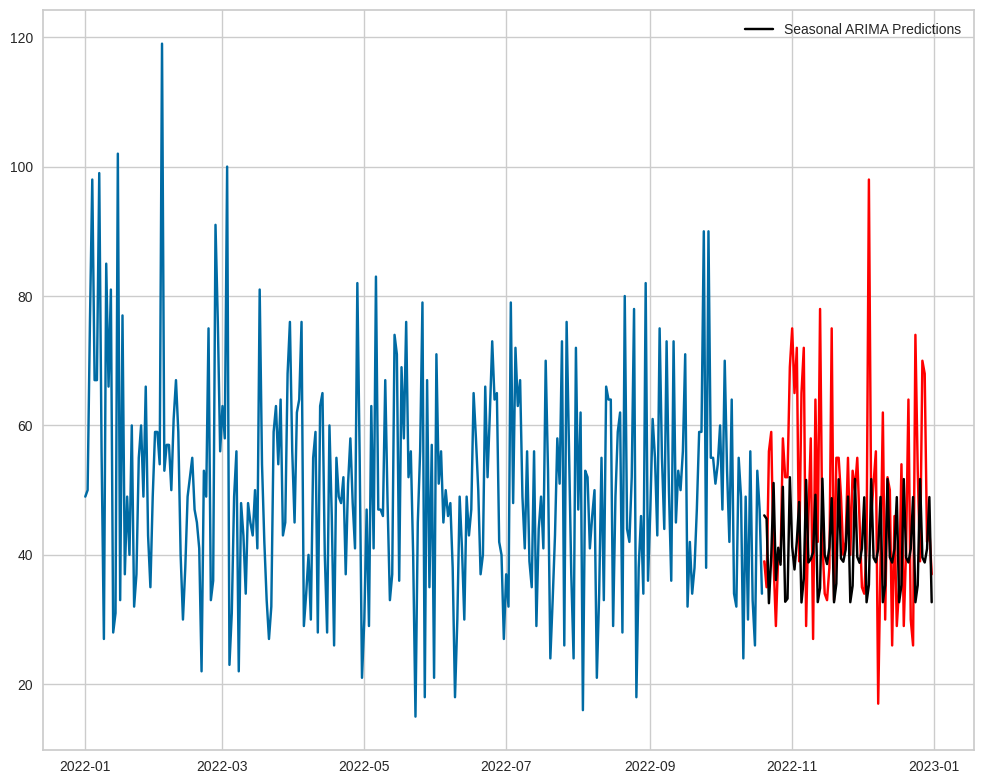

In [288]:
# ARIMA (0,0,0) Seasonal (1,1,0,7)
df_train = train_data.set_index('Date')
df_test = test_data.set_index('Date')

y_pred = fit_qty.get_forecast(len(df_test))

y_pred_df = y_pred.conf_int()
y_pred_df['predictions'] = fit_qty.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = df_test.index
y_pred_out = y_pred_df['predictions']

eval(df_test['Qty'], y_pred_out)

plt.figure(figsize = (10,8))
plt.plot(df_train['Qty'])
plt.plot(df_test['Qty'], color = 'red')
plt.plot(y_pred_out, color = 'black', label = 'Seasonal ARIMA Predictions')
plt.legend()

plt.tight_layout()

## Forecast

In [289]:
model = sm.tsa.SARIMAX(df_test['Qty'], order = (0, 0, 0), seasonal_order = (1, 1, 0, 7))
fit_qty = model.fit()
print(fit_qty.summary())

                                SARIMAX Results                                
Dep. Variable:                     Qty   No. Observations:                   73
Model:             SARIMAX(1, 1, 0, 7)   Log Likelihood                -286.917
Date:                 Sun, 30 Jul 2023   AIC                            577.835
Time:                         09:55:46   BIC                            582.214
Sample:                     10-20-2022   HQIC                           579.565
                          - 12-31-2022                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7       -0.5683      0.100     -5.683      0.000      -0.764      -0.372
sigma2       335.3540     72.827      4.605      0.000     192.615     478.093
Ljung-Box (L1) (Q):                   0.00  

In [290]:
forecast_length = 31
forecast_result = fit_qty.get_forecast(forecast_length)
forecast_result_arima = forecast_result.conf_int()
forecast_result_arima['forecasted Qty'] = fit_qty.predict(start = forecast_result_arima.index[0],
                                                      end = forecast_result_arima.index[-1])
forecast_result_arima['Date'] = pd.date_range(start = '2023-01-01', end = '2023-01-31')
forecast_result_arima.set_index('Date', inplace = True)
forecast_result_arima.head()

,lower Qty,upper Qty,forecasted Qty
Date,,,
2023-01-01,17.676142,89.460497,53.568319
2023-01-02,-2.575369,69.208986,33.316808
2023-01-03,17.626566,89.410921,53.518743
2023-01-04,29.834546,101.618901,65.726723
2023-01-05,-0.712008,71.072347,35.180170


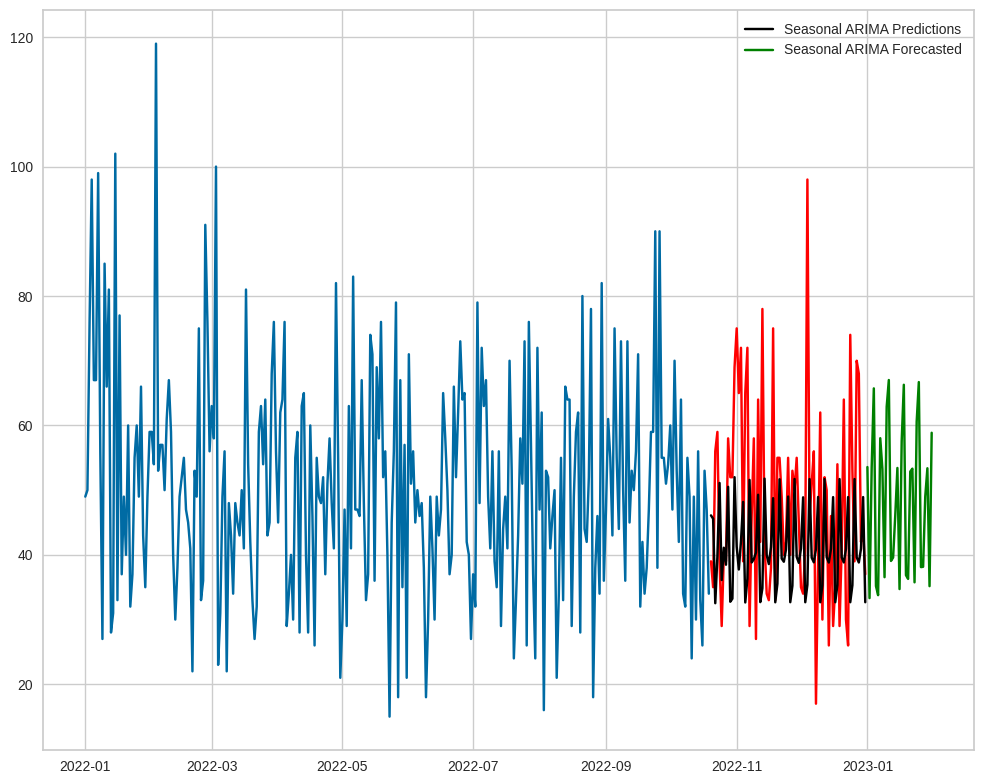

In [291]:
plt.figure(figsize = (10,8))
plt.plot(df_train['Qty'])
plt.plot(df_test['Qty'], color = 'red')
plt.plot(y_pred_out, color = 'black', label = 'Seasonal ARIMA Predictions')
plt.plot(forecast_result_arima['forecasted Qty'], color = 'green', label = 'Seasonal ARIMA Forecasted')
plt.legend()

plt.tight_layout()

# KMeans Clustering

In [292]:
# clustering model
df_cluster = df_merge.groupby('CustomerID').agg({'TransactionID':'count',
                                                 'Qty':'sum',
                                                 'TotalAmount':'sum'}).reset_index()
df_cluster.head()

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


## Data Normalization

In [293]:
# normalization per feature
from sklearn.preprocessing import MinMaxScaler

df_fix = df_cluster.drop('CustomerID', axis = 1)
num_fix = df_fix.columns

df_norm = MinMaxScaler().fit_transform(df_fix)
df_norm = pd.DataFrame(data = df_norm, columns = num_fix)
df_norm.head()

,TransactionID,Qty,TotalAmount
0,0.777778,0.724638,0.703949
1,0.555556,0.681159,0.397827
2,0.666667,0.666667,0.469255
3,0.388889,0.521739,0.278823
4,0.222222,0.246377,0.233899


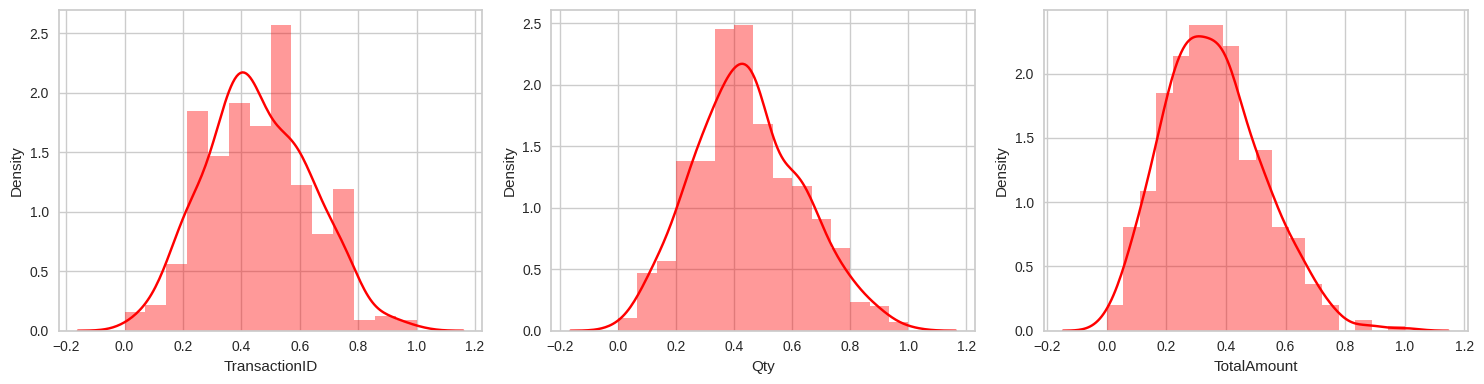

In [322]:
#check distribution
plt.figure(figsize = (15,4))
for i in range(0, len(num_fix)):
  plt.subplot(1, 3, i + 1)
  sns.distplot(df_norm[num_fix[i]], color = 'red')
  plt.xlabel(num_fix[i])
  plt.tight_layout()

## Data Modelling

In [295]:
# check descriptive statistics
df_norm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TransactionID,447.0,0.457246,0.180295,0.0,0.333333,0.444444,0.611111,1.0
Qty,447.0,0.448270,0.184879,0.0,0.318841,0.434783,0.579710,1.0
TotalAmount,447.0,0.358352,0.165166,0.0,0.238073,0.347336,0.462629,1.0


In [296]:
from sklearn.cluster import KMeans
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(df_norm.values)
    inertia.append(kmeans.inertia_)

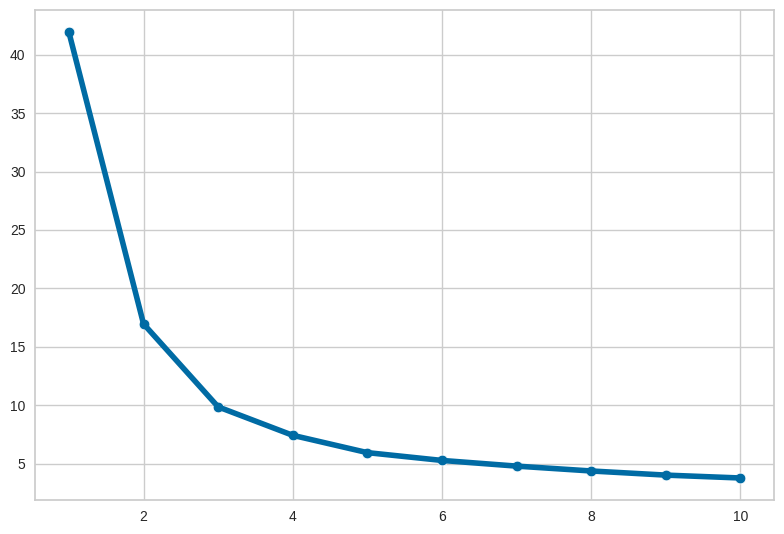

In [297]:
sns.lineplot(x = range(1,11), y = inertia, linewidth = 4)
sns.scatterplot(x = range(1,11), y = inertia, s = 60)
plt.tight_layout()

In [298]:
pd.Series(inertia) - pd.Series(inertia).shift(-1)

0    24.940793
1     7.095549
2     2.432546
3     1.480778
4     0.667887
5     0.484641
6     0.416335
7     0.353157
8     0.246628
9          NaN
dtype: float64

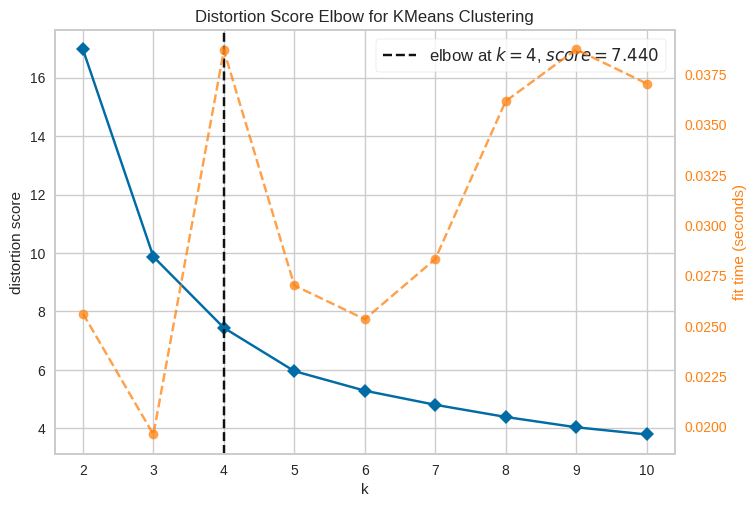

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [299]:
# Distortion Score Elbow
from yellowbrick.cluster import KElbowVisualizer

# fit model
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k = (2,11), metric = 'distortion', timings = True, locate_elbow = True)
visualizer.fit(df_norm)
visualizer.show()

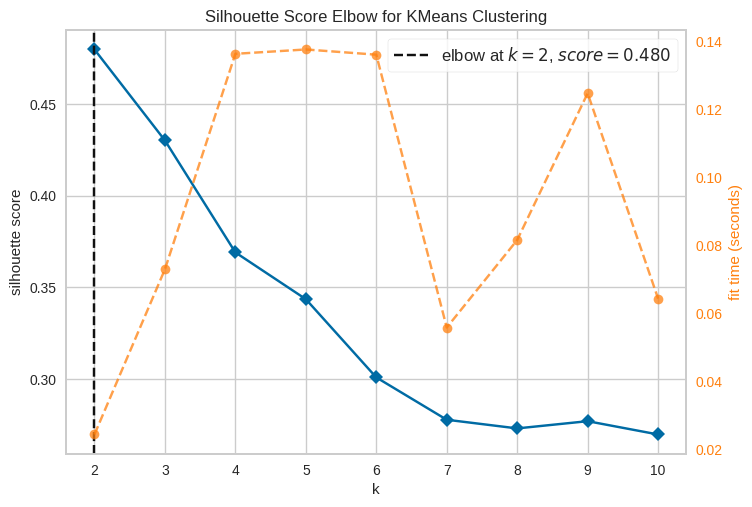

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [300]:
# silhouette score elbow
model = KMeans(random_state = 42)
visualizer = KElbowVisualizer(model, k = (2,11), metric = 'silhouette', timings = True, locate_elbow = True)
visualizer.fit(df_norm)
visualizer.show()

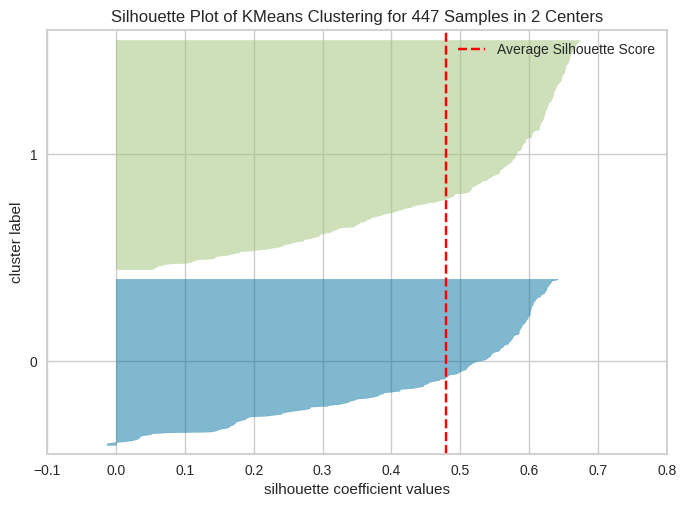

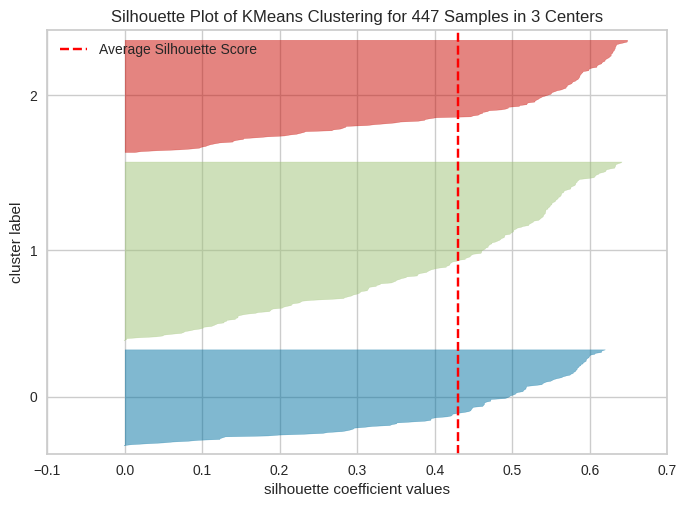

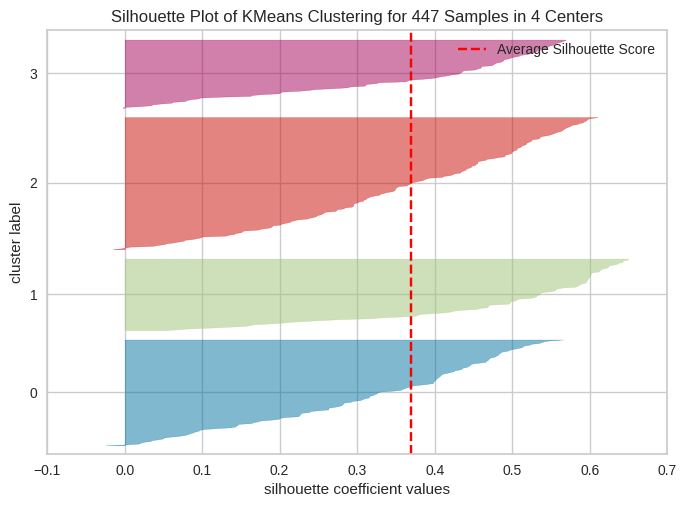

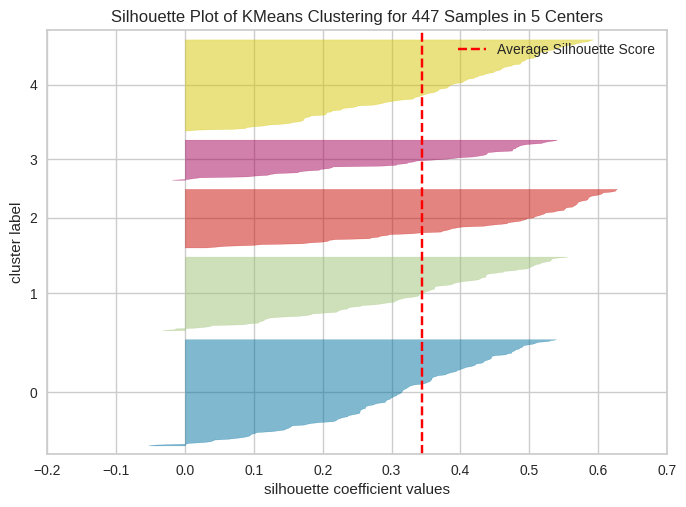

In [301]:
# silhouette plot
from yellowbrick.cluster import SilhouetteVisualizer

for i in range(2,6):
    model = KMeans(i, random_state = 42)
    visualizer = SilhouetteVisualizer(model, colors = 'yellowbrick')
    visualizer.fit(df_norm)
    visualizer.show()

In [302]:
from sklearn.metrics import silhouette_score
for num_clusters in range(2,6):
    #inisialisasi kmeans
    model_clus = KMeans(n_clusters = num_clusters, max_iter = 1000, random_state = 42)
    model_clus.fit(df_norm)

    cluster_labels = model_clus.labels_

    #shilhouette score
    silhouette_avg = silhouette_score(df_norm, cluster_labels)
    print("For n_clusters = {0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters = 2, the silhouette score is 0.47981313905566353
For n_clusters = 3, the silhouette score is 0.4301783058437479
For n_clusters = 4, the silhouette score is 0.3690791804072523
For n_clusters = 5, the silhouette score is 0.3435576108948075


In [303]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, random_state = 42)
kmeans.fit(df_norm.values)

KMeans(n_clusters=3, random_state=42)

In [304]:
#display label  to dataset
# kmeans.labels_ : df_norm
df_norm['label'] = kmeans.labels_

In [305]:
# display df_std
df_norm.head()

,TransactionID,Qty,TotalAmount,label
0,0.777778,0.724638,0.703949,0
1,0.555556,0.681159,0.397827,0
2,0.666667,0.666667,0.469255,0
3,0.388889,0.521739,0.278823,1
4,0.222222,0.246377,0.233899,2


In [306]:
#PCA - split
X = df_norm.copy().drop(['label'], axis = 1)
Y = df_norm['label'].copy()

In [307]:
scaler = MinMaxScaler()
scaler.fit(X)
X_norm = scaler.transform(X)

In [308]:
#PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_norm)

PCA()

In [309]:
# the attribute shows how much variance is explained by each of the three individual components
print('Explained variance ratio:', pca.explained_variance_ratio_)

Explained variance ratio: [0.91882032 0.04943863 0.03174105]


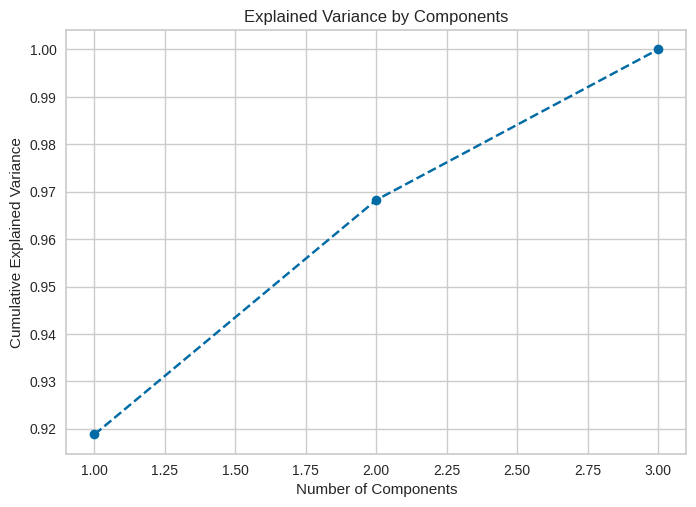

In [310]:
# plot variance ratio cumulative sum of components
plt.plot(range(1,4), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [311]:
#PCA
pca = PCA(n_components = 2)
pca.fit(X_norm)
X_pca = pca.transform(X_norm)

pdf = pd.DataFrame(X_pca, columns = ['1', '2'])
pdf['label'] = Y
pdf.sample(5)

,1,2,label
59,-0.009466,-0.017410,1
165,0.478963,-0.226510,0
241,-0.501241,0.003216,2
234,0.441851,-0.044745,0
341,0.321645,0.099895,0


In [312]:
pdf.describe()

,1,2,label
count,4.470000e+02,4.470000e+02,447.000000
mean,-3.477209e-17,-3.427534e-17,1.042506
std,2.938336e-01,6.815839e-02,0.733858
min,-7.323909e-01,-2.265103e-01,0.000000
25%,-2.000591e-01,-4.428421e-02,1.000000
50%,-2.185101e-02,-1.625522e-04,1.000000
75%,1.951901e-01,4.424016e-02,2.000000
max,9.294527e-01,2.438010e-01,2.000000


In [313]:
pdf.groupby('label').agg(['mean', 'median', 'std', 'count'])

1                                   2                          
           mean    median       std count      mean    median       std count
label                                                                        
0      0.395016  0.350225  0.148091   111 -0.002313  0.003311  0.075887   111
1     -0.000558 -0.008871  0.099826   206  0.002799  0.002417  0.072302   206
2     -0.336399 -0.325018  0.125136   130 -0.002460 -0.004802  0.053106   130

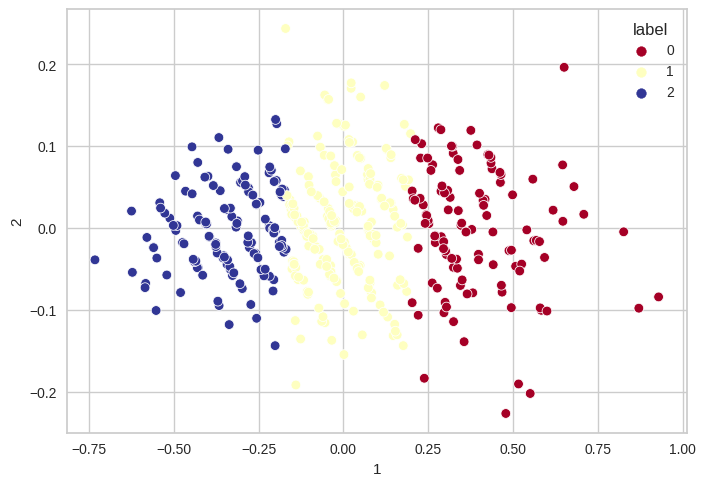

In [314]:
sns.scatterplot(data = pdf, x = '1', y = '2', hue = 'label', palette='RdYlBu')
plt.show()

## Customer Personality Analysis

In [315]:
df_fix['cluster'] = kmeans.labels_
df_fix.groupby('cluster').agg(['count','mean', 'median', 'std'])

TransactionID                               Qty                    \
                count       mean median       std count       mean median   
cluster                                                                     
0                 111  15.351351   15.0  1.776865   111  57.558559   57.0   
1                 206  11.262136   11.0  1.504213   206  40.936893   41.0   
2                 130   7.661538    8.0  1.635620   130  26.723077   27.5   

                  TotalAmount                                         
              std       count           mean    median           std  
cluster                                                               
0        7.071948         111  523573.873874  509900.0  81200.111634  
1        5.275891         206  360200.485437  360750.0  55396.873644  
2        5.866757         130  228653.846154  234550.0  53102.234517

In [316]:
df_fix.describe().T

,count,mean,std,min,25%,50%,75%,max
TransactionID,447.0,11.230425,3.245302,3.0,9.0,11.0,14.0,21.0
Qty,447.0,40.930649,12.756679,10.0,32.0,40.0,50.0,79.0
TotalAmount,447.0,362512.304251,124634.279184,92100.0,271750.0,354200.0,441200.0,846700.0
cluster,447.0,1.042506,0.733858,0.0,1.0,1.0,2.0,2.0


In [317]:
# percentage of customers per cluster
cluster_count = df_fix['cluster'].value_counts().reset_index()
cluster_count.columns = ['cluster', 'count']
cluster_count['percentage (%)'] = round((cluster_count['count']/len(df_fix))*100,2)
cluster_count = cluster_count.sort_values(by = ['cluster']).reset_index(drop = True)
cluster_count

,cluster,count,percentage (%)
0,0,111,24.83
1,1,206,46.09
2,2,130,29.08


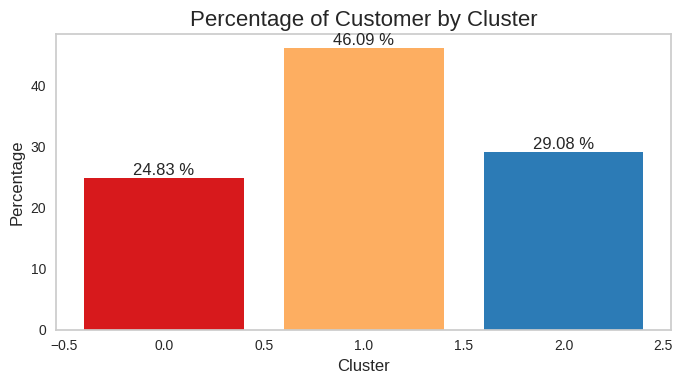

In [318]:
#visualization of the percentage of customers in each cluster
fig, ax = plt.subplots(figsize = (7,4))

c = ["#d7191c","#fdae61","#2c7bb6","#abd9e9", "#ffffbf"]

bars = plt.bar(x = cluster_count['cluster'],
               height = cluster_count['percentage (%)'],
               color = c)

for bar in bars:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s = f'{height} %', ha='center',
  va = 'bottom')

plt.title('Percentage of Customer by Cluster', fontsize = 16)
plt.xlabel('Cluster',fontsize = 12)
plt.ylabel('Percentage',fontsize = 12)
plt.style.use('tableau-colorblind10')
plt.grid(False)
plt.tight_layout()

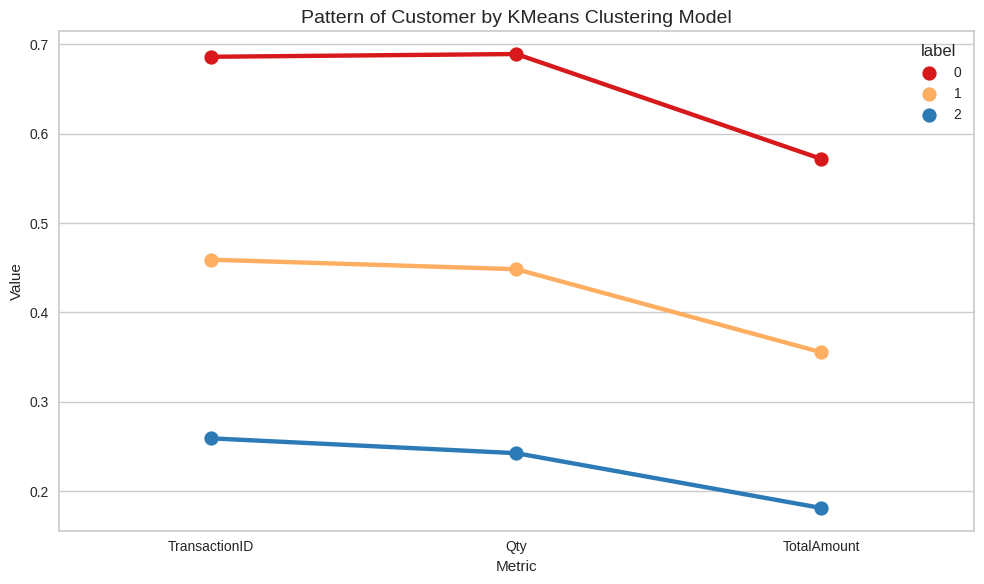

In [319]:
# displays the column pattern in each cluster
cluster_med = df_norm.groupby('label').mean().reset_index()

df_melt = pd.melt(cluster_med.reset_index(),
                  id_vars='label',
                  value_vars = num_fix,
                  var_name = 'Metric',
                  value_name = 'Value')

plt.figure(figsize=(10,6))
sns.pointplot(data = df_melt, x = 'Metric', y = 'Value', hue = 'label', palette = c)
plt.title('Pattern of Customer by KMeans Clustering Model', fontsize = 14)
plt.xlabel('Metric')
plt.ylabel('Value')
plt.tight_layout()

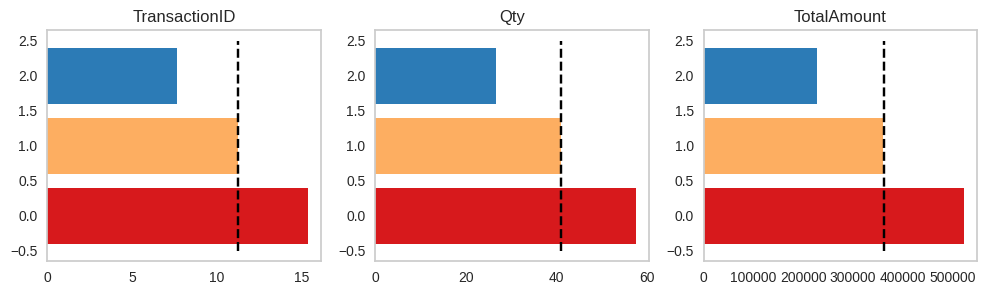

In [320]:
# displays the average of the variables between clusters
def dist_list(clust):
    plt.figure(figsize = [len(clust)*4,3])
    i = 1
    for col in clust:
        ax = plt.subplot(1,len(clust),i)
        ax.vlines(df_fix[col].mean(), ymin = -0.5, ymax = 2.5, color = 'black', linestyle='--')
        g = df_fix.groupby('cluster')
        x = g[col].mean().index
        y = g[col].mean().values
        ax.barh(x,y, color = c)
        plt.title(col)
        plt.grid(False)
        i = i+1

dist_list(num_fix)

In [321]:
df_fix.groupby('cluster').agg(['min', 'max', 'mean']).reset_index(drop = True).T

0              1              2
TransactionID min       11.000000       7.000000       3.000000
              max       21.000000      15.000000      11.000000
              mean      15.351351      11.262136       7.661538
Qty           min       44.000000      27.000000      10.000000
              max       79.000000      54.000000      39.000000
              mean      57.558559      40.936893      26.723077
TotalAmount   min   365000.000000  215100.000000   92100.000000
              max   846700.000000  516600.000000  329300.000000
              mean  523573.873874  360200.485437  228653.846154

<p style="text-align: center;">
Tabel - Akumulasi Hasil Nilai Fitur pada Setiap Cluster
</p>

|  Cluster  | High Value | Average Value | Low Value |
| :-------- | :--------: | :-----------: | :-------: |
| **Cluster 0** | TransactionID, Qty, TotalAmount |  |  |
| **Cluster 1** |  | TransactionID, Qty, TotalAmount |  |
| **Cluster 2** |  |  | TransactionID, Qty, TotalAmount |

### Clustering Interpretation

1. **Cluster 0 - Loyalty Customer**
    - Terdapat 111 customer (24.83%).
    - Customer di kelompok ini memiliki rata-rata transaksi yang tinggi, yaitu sekitar 15 kali transaksi, rata-rata jumlah atau kuantitas produk yang dibeli customer tinggi yaitu sekitar 58 unit produk, dan rata-rata jumlah uang yang dikeluarkan oleh customer tinggi yaitu sekitar 524K.
</p>
2. **Cluster 1 - Potential Customer**
    - Terdapat 206 customer (46.09%)
    - Customer di kelompok ini memiliki rata-rata transaksi yang sedang, yaitu sekitar 11 kali transaksi, rata-rata jumlah atau kuantitas produk yang dibeli customer sedang yaitu sekitar 41 unit produk, dan rata-rata jumlah uang yang dikeluarkan oleh customer sedang yaitu sekitar 360K.
</p>
3. **Cluster 2 - New Customer**
    - Terdapat 130 customer (29.08%)
    - Customer di kelompok ini memiliki rata-rata transaksi yang rendah, yaitu sekitar 8 kali transaksi, rata-rata jumlah atau kuantitas produk yang dibeli customer rendah yaitu sekitar 27 unit produk, dan rata-rata jumlah uang yang dikeluarkan oleh customer rendah yaitu sekitar 229K.

### Business Recommendation
1. **Cluster 0 - Loyalty Customer**: memberikan email khusus kepada customer atas keloyalitasan telah menggunakan produk dari company kami berupa ucapan terima kasih telah setia menggunakan produk kami dengan menyertakan reward voucher diskon berbelanja tanpa minimum pembelian beserta voucher gratis ongkir tanpa minimum pembelian dan dapat ditukarkan pada batas waktu tertentu.
</p>
2. **Cluster 1 - Potential Customer**: kelompok ini memiliki potensi untuk menjadi customer yang loyal menggunakan produk dari company. Hal yang dapat direkomendasikan berupa pemberian voucher diskon khusus pada produk yang sering dibeli oleh customer ini dengan voucher gratis ongkir dengan nol minimum pembelian.
</p>
3. **Cluster 2 - New Customer**: memberikan email khusus kepada customer dengan caption seperti "we miss you" agar kelompok ini bisa lebih sering berbelanja produk pada company kami dengan menyertakan reward voucher diskon berbelanja jika telah mencapai minimum pembelian yang telah ditentukan oleh company beserta voucher gratis ongkir jika mencapai minimum pembelian yang telah ditentukan oleh company juga dan dapat ditukarkan pada batas waktu tertentu.